<a href="https://colab.research.google.com/github/Laser57/MNA_EQUIPO27/blob/main/MNA_IAyAA_semana_7_Actividad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 7**
###**Red Neuronal Artificial - Perceptrón Multicapa : Multilayer Perceptrón (MLP)**


**Nombres y matrículas de los integrantes del equipo:**

*   Luis Alfonso Sabanero Esquivel A01273286
*   José Antonio Mendoza Castro    A01794067
*   Alan Avelino Fernández Juárez  A00989308
*   Miguel Angel Paredes Gutierrez A01794138
*   Fernando Sebastián Sánchez Cardona A01687530


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [85]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split,GridSearchCV,RepeatedKFold,cross_validate

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer,MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import make_scorer

from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error,mean_absolute_error


#**Ejercicio-1.** 

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset_Facebook.csv', sep=';')
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [14]:
X=df.iloc[:,0:7]
X

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid
0,139441,Photo,2,12,4,3,0.0
1,139441,Status,2,12,3,10,0.0
2,139441,Photo,3,12,3,3,0.0
3,139441,Photo,2,12,2,10,1.0
4,139441,Photo,2,12,2,3,0.0
...,...,...,...,...,...,...,...
495,85093,Photo,3,1,7,2,0.0
496,81370,Photo,2,1,5,8,0.0
497,81370,Photo,1,1,5,2,0.0
498,81370,Photo,3,1,4,11,0.0


In [15]:
y=df["Lifetime People who have liked your Page and engaged with your post"]
y

0       119
1      1108
2       132
3      1386
4       396
       ... 
495     392
496     301
497     363
498     370
499     316
Name: Lifetime People who have liked your Page and engaged with your post, Length: 500, dtype: int64

In [16]:
X=df.iloc[:,0:7] #Para la entrada 
y=df["Lifetime People who have liked your Page and engaged with your post"] 
#Para la de salida: Lifetime people who have liked a page and engaged with a post
#The number of people who have liked a Page and clicked anywhere in a post (Unique users).

#**Ejercicio-2.**

In [17]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.20, random_state=11)

#**Ejercicio-3.**

In [98]:
def mi_rmse(ytest, ypred):
    rmse=np.mean(np.square(ytest-ypred))**(1/2)
    return rmse
def mi_mse(ytest, ypred):
    mse=np.mean(np.square(ytest-ypred))
    return mse

def mi_mae(ytest, ypred):
    mae=np.mean(np.abs(ytest-ypred))
    return mae

def mi_mape(ytest, ypred):
    mape=np.mean(np.abs((ytest-ypred)/ytest))
    return mape

def get_models():
  modelos = list()
  nombres = list()

  # LR - Regresión Lineal:
  modelos.append(LinearRegression())
  nombres.append('LR')

  # RF - RANDOM FOREST:
  modelos.append(RandomForestRegressor())
  nombres.append('RF')

  # MLP - PERCEPTRON MULTICAPA:
  modelos.append(MLPRegressor(max_iter=1000))
  nombres.append('MLP')

  return modelos, nombres

#**Ejercicio-4.**

In [19]:
categorical= ['Type','Category','Paid']
numerical=['Page total likes']
temporales=['Post Month','Post Weekday','Post Hour']

In [104]:
#Transformaciones a factores numéricos de entrada:
numerical_pipeline = Pipeline(steps = [('impMean', SimpleImputer(strategy='median')),
                                 ('escalaNum', MinMaxScaler(feature_range=(1,2))),
                                 ])   
numerical_pipeline_nombres = numerical

# Transformaciones a factores categóricos de entrada:
categorical_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),
                                ('OneHotE', OneHotEncoder(handle_unknown="ignore"))])  
categorical_pipeline_nombres = categorical



# Conjuntamos las transformaciones numéricas y categóricas que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(transformers = [('numpipe', numerical_pipeline, numerical_pipeline_nombres),
                                                        ('catimp', categorical_pipeline, categorical_pipeline_nombres),
                                                        ],
                                        remainder='passthrough')

#**Ejercicio-5.**

In [105]:
DX_train, DX_val, Dy_train, Dy_val= train_test_split(X, y, test_size=0.25, random_state=11)
modeloDummy = DummyRegressor()  
pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modeloDummy)])
pipeline.fit(DX_train, Dy_train)  
Dy_pred_val = pipeline.predict(DX_val)
Dy_pred= pipeline.predict(DX_train)

In [106]:
print("RSME train: {}".format(mi_rmse(Dy_train, Dy_pred)))
print("MAE train: {}".format(mi_mae(Dy_train, Dy_pred)))
print("MAPE: {}".format(mi_mape(Dy_train, Dy_pred)))

RSME train: 666.3984615375065
MAE train: 435.7444266666667
MAPE: 1.653565824024301


In [107]:
print("RSME validation: {}".format(mi_rmse(Dy_val, Dy_pred_val)))
print("MAE validation: {}".format(mi_mae(Dy_val, Dy_pred_val)))
print("MAPE validation: {}".format(mi_mape(Dy_val, Dy_pred_val)))

RSME validation: 413.3659770765422
MAE validation: 318.2251306666667
MAPE validation: 1.2105914511280633


#**Ejercicio-6.**

In [108]:
modelos, nombres = get_models()
resultados = list()

for i in range(len(modelos)):
    kfold = RepeatedKFold(n_splits=2, n_repeats=2, random_state=11)
    #for train_index, val_index in kfold.split(X_train):
    #    CVX_train, CVX_val = X_train.iloc[train_index], X_train.iloc[val_index]
    #    CVy_train, CVy_val = y_train.iloc[train_index], y_train.iloc[val_index]
       
    pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])
    mismetricas =  {"RMSE": make_scorer(mi_rmse),
                    "MAE": make_scorer(mi_mae),
                    'MAPE':make_scorer(mi_mape), 
                    }

    scores = cross_validate(pipeline, X_train, y_train, scoring=mismetricas, cv=kfold,return_train_score=True)

    resultados.append(scores)
    print('%s:\nRMSE: %.3f (%.4f)\nMAE: %.3f (%.4f)\nMAPE: %.3f (%.4f)\n' % (nombres[i],
                                                                        np.mean(scores['test_RMSE']),
                                                                        np.std(scores['test_RMSE']), 
                                                                        np.mean(scores['test_MAE']),
                                                                        np.std(scores['test_MAE']), 
                                                                        np.mean(scores['test_MAPE']),
                                                                        np.std(scores['test_MAPE']),
                                                                        ))


LR:
RMSE: 802.659 (75.4152)
MAE: 607.965 (68.9494)
MAPE: 2.406 (1.4240)

RF:
RMSE: 769.210 (44.0765)
MAE: 539.908 (36.0768)
MAPE: 1.784 (0.8919)



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLP:
RMSE: 686.095 (15.6511)
MAE: 512.071 (15.2808)
MAPE: 2.025 (0.8276)



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


#**Ejercicio-7.**

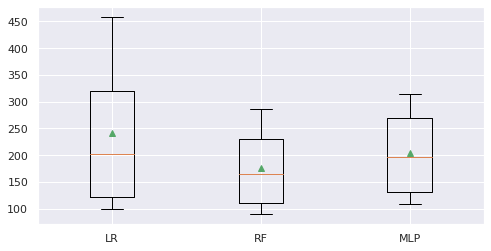

In [50]:
#Diagrama de caja
sns.set(rc={'figure.figsize':(8,4)})

bpMAPE = list()
for i in range(len(resultados)):
  rr = resultados[i]['test_MAPE']
  bpMAPE.append(rr)

plt.boxplot(bpMAPE, labels=nombres, showmeans=True)

plt.show()

#**Ejercicio-8.**

In [ ]:
None

#**Ejercicio-9.**

In [ ]:
None

#**Ejercicio-10.**

In [ ]:
None

#**Ejercicio-11.**

In [ ]:
None

#**Ejercicio-12.**

In [ ]:
None

###**Fin de la Actividad de la semana 7.**